MNIST Classification with Regularization & Learning Rate Scheduling


In [6]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt


Load and preprocess the MNIST data


In [7]:

(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()

train_images = train_images.astype("float32") / 255.0
test_images = test_images.astype("float32") / 255.0

train_images = train_images.reshape((60000, 28 * 28))
test_images = test_images.reshape((10000, 28 * 28))


Function to compile and train the model


In [8]:
def compile_and_train(model, name):
    optimizer = keras.optimizers.Adam(learning_rate=0.001)

    lr_schedule = keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=3,
        min_lr=1e-6,
        verbose=1
    )

    early_stop = keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=5,
        restore_best_weights=True
    )

    model.compile(
        optimizer=optimizer,
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    history = model.fit(
        train_images, train_labels,
        validation_split=0.2,
        epochs=30,
        batch_size=128,
        callbacks=[lr_schedule, early_stop],
        verbose=1
    )
    return history

In [9]:
# Model 1: L2 Regularization Only
model_1 = keras.Sequential([
    keras.layers.Input(shape=(784,)),
    keras.layers.Dense(512, activation='relu', kernel_regularizer=keras.regularizers.l2(1e-4)),
    keras.layers.Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l2(1e-4)),
    keras.layers.Dense(10, activation='softmax')
])

# Model 2: L1 + Dropout + Batch Normalization
model_2 = keras.Sequential([
    keras.layers.Input(shape=(784,)),
    keras.layers.Dense(512, kernel_regularizer=keras.regularizers.l1(1e-5)),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(128, kernel_regularizer=keras.regularizers.l2(1e-4)),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation='softmax')
])


In [10]:
# Train model 1
history_1 = compile_and_train(model_1, "Model 1")

Epoch 1/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8597 - loss: 0.5543 - val_accuracy: 0.9593 - val_loss: 0.1976 - learning_rate: 0.0010
Epoch 2/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9681 - loss: 0.1718 - val_accuracy: 0.9636 - val_loss: 0.1874 - learning_rate: 0.0010
Epoch 3/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9793 - loss: 0.1311 - val_accuracy: 0.9747 - val_loss: 0.1421 - learning_rate: 0.0010
Epoch 4/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9840 - loss: 0.1125 - val_accuracy: 0.9728 - val_loss: 0.1468 - learning_rate: 0.0010
Epoch 5/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9876 - loss: 0.0983 - val_accuracy: 0.9740 - val_loss: 0.1438 - learning_rate: 0.0010
Epoch 6/30
369/375 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9893 - loss: 0.0910
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9893 - loss: 0.0910 - v

In [11]:
# Train model 2
history_2 = compile_and_train(model_2, "Model 2")

Epoch 1/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.8378 - loss: 0.6645 - val_accuracy: 0.9631 - val_loss: 0.2368 - learning_rate: 0.0010
Epoch 2/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9574 - loss: 0.2537 - val_accuracy: 0.9704 - val_loss: 0.2000 - learning_rate: 0.0010
Epoch 3/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9691 - loss: 0.2039 - val_accuracy: 0.9733 - val_loss: 0.1837 - learning_rate: 0.0010
Epoch 4/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9745 - loss: 0.1801 - val_accuracy: 0.9753 - val_loss: 0.1759 - learning_rate: 0.0010
Epoch 5/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9769 - loss: 0.1678 - val_accuracy: 0.9737 - val_loss: 0.1818 - learning_rate: 0.0010
Epoch 6/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9777 - loss: 0.1629 - val_accuracy: 0.9759 - val_loss: 0.1706 - learning_rate: 0.0010
Epoch 7/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9800 - loss: 0.

Plotting training & validation loss and accuracy


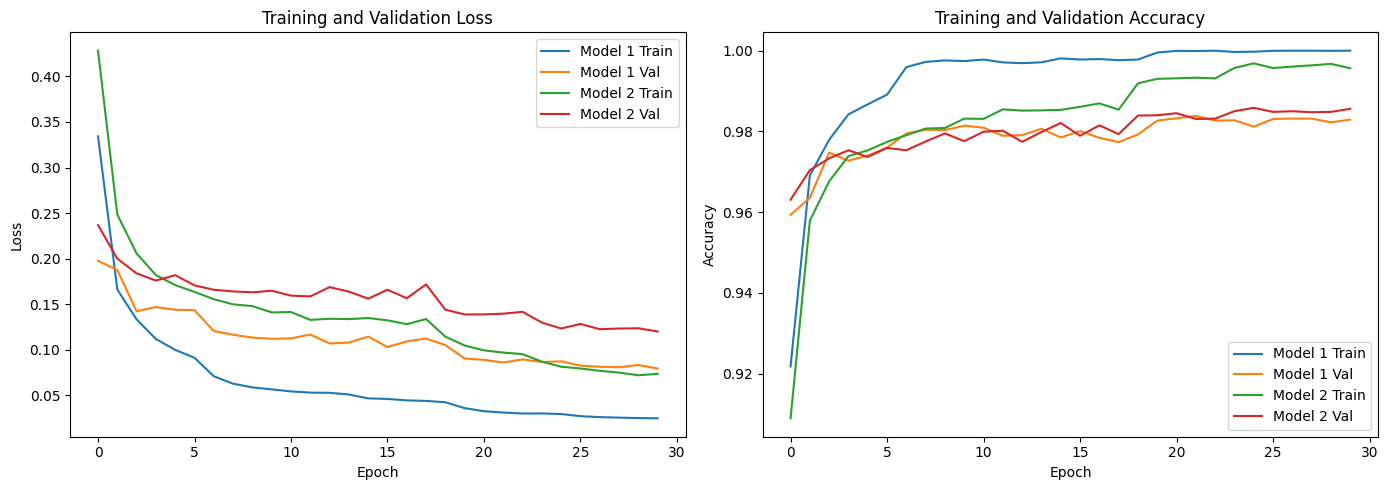

In [12]:
def plot_history(histories, names):
    plt.figure(figsize=(14, 5))

    # Loss plot
    plt.subplot(1, 2, 1)
    for history, name in zip(histories, names):
        plt.plot(history.history['loss'], label=f'{name} Train')
        plt.plot(history.history['val_loss'], label=f'{name} Val')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    # Accuracy plot
    plt.subplot(1, 2, 2)
    for history, name in zip(histories, names):
        plt.plot(history.history['accuracy'], label=f'{name} Train')
        plt.plot(history.history['val_accuracy'], label=f'{name} Val')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_history([history_1, history_2], ['Model 1', 'Model 2'])

Evaluate on test data


In [13]:
test_loss_1, test_acc_1 = model_1.evaluate(test_images, test_labels, verbose=0)
test_loss_2, test_acc_2 = model_2.evaluate(test_images, test_labels, verbose=0)

print(f"Model 1 - Test Accuracy: {test_acc_1:.4f}, Test Loss: {test_loss_1:.4f}")
print(f"Model 2 - Test Accuracy: {test_acc_2:.4f}, Test Loss: {test_loss_2:.4f}")


Model 1 - Test Accuracy: 0.9834, Test Loss: 0.0716
Model 2 - Test Accuracy: 0.9857, Test Loss: 0.1106


Summary:


In [14]:
print("\n=== Performance Analysis ===")
print(f"Model 1:\n- Regularization: L2 only\n- Final Training Loss: {history_1.history['loss'][-1]:.4f}\n"
      f"- Final Validation Loss: {history_1.history['val_loss'][-1]:.4f}\n"
      f"- Test Accuracy: {test_acc_1:.4%}, Test Loss: {test_loss_1:.4f}")

print(f"\nModel 2:\n- Regularization: L1, BatchNorm, Dropout\n- Final Training Loss: {history_2.history['loss'][-1]:.4f}\n"
      f"- Final Validation Loss: {history_2.history['val_loss'][-1]:.4f}\n"
      f"- Test Accuracy: {test_acc_2:.4%}, Test Loss: {test_loss_2:.4f}")



=== Performance Analysis ===
Model 1:
- Regularization: L2 only
- Final Training Loss: 0.0247
- Final Validation Loss: 0.0793
- Test Accuracy: 98.3400%, Test Loss: 0.0716

Model 2:
- Regularization: L1, BatchNorm, Dropout
- Final Training Loss: 0.0735
- Final Validation Loss: 0.1199
- Test Accuracy: 98.5700%, Test Loss: 0.1106
